<a href="https://colab.research.google.com/github/AbiaAlvesReis/Projeto-IA-2022-01/blob/main/AMMS_KNN_opcao2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
# bibliotecas para trabalhar offline com a biblioteca
import plotly
import plotly.offline as py
import plotly.graph_objs as go # criará de fato os gráficos
from plotly.offline import plot, iplot
import cufflinks as cf # para conectar o plotly ao pandas
cf.go_offline()
plotly.offline.init_notebook_mode(connected = True)
# Import everything
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from google.colab import drive

drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook_connected'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [ ]:
pio.renderers.default = 'colab'

In [ ]:
# Create a DataFrame
df = pd.read_excel('//content/drive/MyDrive/2022/IA - projeto/dados brutos mega sena/mega.xlsx', parse_dates=True, index_col=2)

In [ ]:
# Print the head of the data.
df.head()

,lottery,date,ball_02,ball_03,ball_04,ball_05,ball_06
ball_01,,,,,,,
41.0,1.0,1996-03-11,5.0,4.0,52.0,30.0,33.0
9.0,2.0,1996-03-18,39.0,37.0,49.0,43.0,41.0
36.0,3.0,1996-03-25,30.0,10.0,11.0,29.0,47.0
6.0,4.0,1996-04-01,59.0,42.0,27.0,1.0,5.0
1.0,5.0,1996-04-08,19.0,46.0,6.0,16.0,2.0


conjunto de dados

In [ ]:
df.shape

(2485, 7)

In [ ]:
df.drop('lottery', inplace=True, axis=1)

In [ ]:
df.drop('date', inplace=True, axis=1)

In [ ]:
df.describe()


,ball_02,ball_03,ball_04,ball_05,ball_06
count,2485.000000,2485.000000,2485.000000,2485.00000,2485.000000
mean,30.151710,30.734406,30.752918,30.55493,30.372233
std,17.367138,17.328347,17.248985,17.17453,17.173908
min,1.000000,1.000000,1.000000,1.00000,1.000000
25%,15.000000,16.000000,16.000000,15.00000,16.000000
50%,31.000000,31.000000,31.000000,31.00000,30.000000
75%,45.000000,45.000000,45.000000,45.00000,45.000000
max,60.000000,60.000000,60.000000,60.00000,60.000000


In [ ]:
df.head()

,ball_02,ball_03,ball_04,ball_05,ball_06
ball_01,,,,,
41.0,5.0,4.0,52.0,30.0,33.0
9.0,39.0,37.0,49.0,43.0,41.0
36.0,30.0,10.0,11.0,29.0,47.0
6.0,59.0,42.0,27.0,1.0,5.0
1.0,19.0,46.0,6.0,16.0,2.0


In [ ]:
# X =  colunas de informação, variáveis independentes
#X = df
# y = Variável dependente, a qual será utilizada para classificar os dados
#y = df


X = df.iloc[:, [0, 1, 2, 3, 4]].values
y = df.iloc[:, +1].values

In [ ]:
# Verificando se X está com a coluna class 
X

array([[ 5.,  4., 52., 30., 33.],
       [39., 37., 49., 43., 41.],
       [30., 10., 11., 29., 47.],
       ...,
       [49., 34., 38., 40., 20.],
       [36., 41., 54., 14., 11.],
       [12., 38., 47.,  5., 32.]])

In [ ]:
y

array([ 4., 37., 10., ..., 34., 41., 38.])

In [ ]:
#Importando o encoder para transformar as labels em chaves numéricas
from sklearn.preprocessing import OneHotEncoder
Oht_enc = OneHotEncoder()
X = pd.DataFrame(Oht_enc.fit_transform(X).A)

In [ ]:
X.shape

(2485, 300)

In [ ]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3)

In [ ]:
#Importing librarie
from sklearn.preprocessing import StandardScaler

In [ ]:

from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)


X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

In [ ]:
#Importando o modelo KNN
from sklearn.neighbors import KNeighborsClassifier  

# Definindo o valor de visinhos
classifier = KNeighborsClassifier(n_neighbors=5)  

#Treinando o modelo, com dados de treinamento
classifier.fit(X_train, y_train)  

KNeighborsClassifier()

In [ ]:
KNeighborsClassifier(algorithm='auto', leaf_size=60, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

KNeighborsClassifier(leaf_size=60, n_neighbors=6)

In [ ]:
#### Prevendo os valores de Y para os dados de teste (X_test)
y_pred = classifier.predict(X_test)
print(y_pred)


[23. 27. 12. 35. 17. 56. 15.  2.  5. 45. 26. 53.  5. 20. 10. 27.  9. 55.
 51.  9. 12. 15.  1.  6.  3.  7. 18. 27. 10. 27. 23.  2. 18. 57. 44. 29.
 54.  8. 54. 46. 34. 59. 30.  2. 16. 27.  6. 12.  2.  2.  7. 38. 42.  1.
 12. 32.  8. 42. 48.  1.  5. 37.  4. 32. 55. 11. 17. 18. 10. 18. 16. 34.
  4.  6. 15.  5.  2. 43. 22. 17.  1.  8. 27. 14. 47. 37. 27. 31.  3. 58.
  2. 11.  5. 58. 27. 10. 14. 22. 58. 49. 25. 16. 18. 18. 21. 32. 31. 59.
 54. 24. 14. 50.  1. 59.  7. 42.  3.  1. 12. 30. 11. 15. 53.  5. 31.  2.
  7. 21. 54. 10. 20.  8.  3. 51.  2. 30. 57. 42. 34. 18.  7. 35. 24. 48.
  8. 12. 42.  2. 24. 54.  5.  4.  4. 16. 60. 45.  4.  9. 50. 58.  5. 49.
 12. 30.  5. 15.  8.  8. 42. 39. 33. 12.  5. 52. 56. 36. 19. 18. 13.  3.
  1. 13.  8. 41. 27. 12. 15. 27. 20. 18. 16. 14.  1.  4. 12. 11. 17. 39.
 17. 52. 29. 49. 33. 15.  5. 10. 32. 11.  1. 15. 40. 59. 12. 37.  8.  2.
 11. 27. 29. 38. 44.  4. 44. 40. 18. 16. 33.  6. 22. 45. 14.  3.  8.  7.
 44. 27. 20. 22.  2. 55. 29. 47. 52. 59. 23. 39.  4

In [ ]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 10):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    print(pred_i)

[23. 10. 53. 58. 17. 13. 16. 41.  5. 45. 43. 53.  5. 19. 10. 37.  9. 42.
 51. 43. 37. 15. 58. 13.  3. 58. 50. 41. 10. 23.  8.  2. 37. 27. 44. 50.
 42. 46. 54. 24. 35. 59. 30. 36. 53. 54.  6. 49. 56.  2. 17.  1.  7.  1.
 12. 32.  8. 43. 48. 32. 12. 41.  4. 32. 55. 35. 29. 20. 10. 18. 49. 18.
 38. 20. 41. 14. 58.  6. 20. 27.  1.  8.  7. 30. 54. 37.  6. 38.  7. 31.
 29. 23. 37. 28. 33. 10. 60. 19. 49. 49. 42. 58. 56. 44. 49. 52. 31. 59.
 54. 58. 14. 50. 51. 59.  7. 27. 48. 59. 22. 48. 11. 15. 53. 33. 34.  2.
 23. 30. 20. 10. 20. 29.  3. 51.  6. 27. 57. 23. 34. 40. 49. 35. 58.  7.
 29. 27. 42. 13. 24. 27.  5. 51. 23. 18. 60. 53.  4. 25. 58. 24. 34. 49.
 12. 36. 54. 15. 45. 13.  7. 25. 37.  2.  5. 24. 35.  3. 19. 44. 38.  3.
  1. 13. 31. 41. 37. 33. 42. 35. 20. 23.  8. 23. 13.  4. 34. 35. 59. 58.
 24. 52.  2. 34. 33. 15. 51. 10. 30. 47. 40. 15. 29. 24. 12. 37. 30.  2.
 45. 41. 46. 48. 53. 35. 51. 38. 58. 55. 33.  6. 22. 31. 14.  3. 35. 18.
 44. 59. 20. 22. 44. 17. 51. 56. 37. 13. 27. 39.  4

Text(0, 0.5, 'Mean Error')

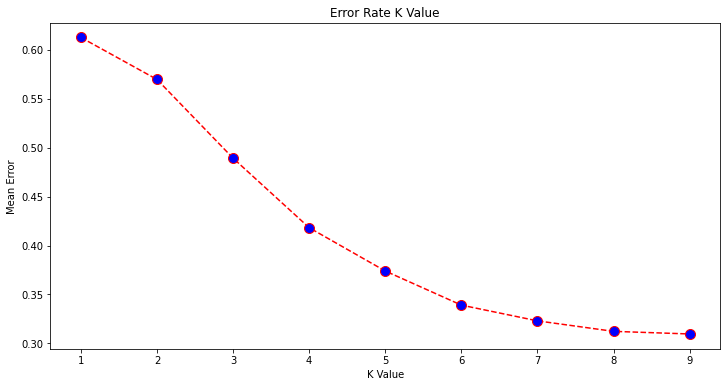

In [ ]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

In [ ]:
print(knn)

KNeighborsClassifier(n_neighbors=9)


In [ ]:
# Treinando o modelo KNN com o melhor parâmetro para K

from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=1)  
classifier.fit(X_train, y_train)  

KNeighborsClassifier(n_neighbors=1)

In [ ]:
KNeighborsClassifier(algorithm='auto', leaf_size=60, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

KNeighborsClassifier(leaf_size=60, n_neighbors=6)

In [ ]:
# Aplicando os valores de teste novamente
y_pred = classifier.predict(X_test) 
y_pred

array([16., 59., 30., 10., 38., 27., 19., 57., 24., 53.,  1.,  2.,  2.,
       32., 18., 17., 54., 56., 44., 39., 52., 20., 15., 48., 56., 28.,
       58., 14., 53., 40., 43., 38., 16., 26.,  4., 30., 60., 18., 16.,
       42.,  8., 29., 46., 21., 48., 11., 30., 21., 36., 30., 34., 12.,
       36.,  5.,  1., 27., 49., 42., 60., 13., 32.,  7., 27., 41., 20.,
       21., 19., 23., 14., 51., 30., 55.,  8., 17.,  6., 34., 52., 43.,
       38., 29., 43.,  1., 30., 45.,  3.,  6., 26., 43., 42., 34., 53.,
       59., 59.,  2., 53., 53., 23., 55., 45., 46., 11., 36., 37., 44.,
       58., 21., 42., 43., 20., 27., 22., 45.,  2., 43., 20., 28., 14.,
       60., 37., 59., 38., 59.,  4., 44.,  1., 28., 24., 57., 53., 38.,
       36., 26., 32., 58.,  6., 30., 57.,  2., 34., 35., 42., 25., 42.,
        1., 36., 56., 26.,  8.,  2.,  4., 45., 57., 58., 38., 30.,  5.,
       40., 27., 27., 53., 27., 29., 32., 22., 37., 32.,  4., 58., 53.,
        7., 43., 55., 27., 44., 16., 59., 48., 10., 18., 16., 54

In [ ]:
# Importando métricas para validação do modelo
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# Imprimindo a matriz confusa
print("Matriz Confusa: ")
print(confusion_matrix(y_test, y_pred), "\n")  

Matriz Confusa: 
[[14  0  0 ...  0  0  0]
 [ 0 16  0 ...  0  0  0]
 [ 0  0  6 ...  0  0  0]
 ...
 [ 2  0  0 ...  7  0  0]
 [ 1  0  0 ...  0  7  0]
 [ 0  0  0 ...  0  0  7]] 



In [ ]:
# Imprimindo o relatório de classificação
print("Relatório de classificação: \n", classification_report(y_test, y_pred))  

Relatório de classificação: 
               precision    recall  f1-score   support

         1.0       0.37      0.54      0.44        13
         2.0       0.09      0.18      0.12        11
         3.0       0.67      0.22      0.33         9
         4.0       0.35      0.40      0.38        15
         5.0       0.36      0.40      0.38        10
         6.0       0.50      0.42      0.45        12
         7.0       0.60      0.27      0.37        11
         8.0       0.44      0.70      0.54        10
         9.0       0.38      0.43      0.40         7
        10.0       0.67      0.62      0.64        13
        11.0       0.64      0.50      0.56        14
        12.0       0.64      0.41      0.50        17
        13.0       0.47      0.53      0.50        15
        14.0       0.75      0.50      0.60        18
        15.0       0.38      0.33      0.35         9
        16.0       0.33      0.33      0.33         9
        17.0       0.22      0.25      0.24        

In [ ]:
# Imprimindo o quão acurado foi o modelo
print('Acurácia do modelo: ' , accuracy_score(y_test, y_pred))

Acurácia do modelo:  0.4075067024128686
